In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
#import pandas_profiling
from pydantic_settings import BaseSettings
%matplotlib inline
df = pd.read_csv('framingham.csv')

C:\Users\19666\AppData\Local\Temp\ipykernel_27756\3651101966.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPMeds'].fillna(0, inplace = True)
C:\Users\19666\AppData\Local\Temp\ipykernel_27756\3651101966.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

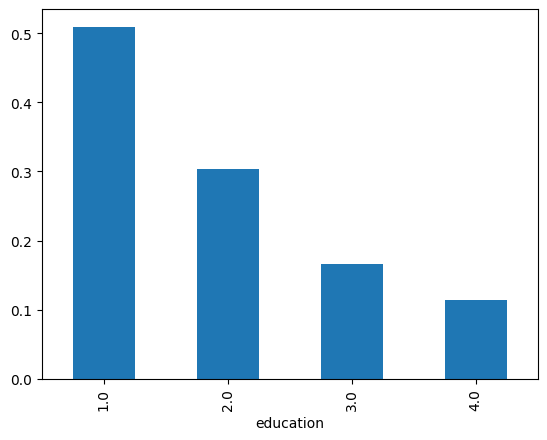

In [3]:
df['TenYearCHD'].value_counts(normalize = True)
df['cigsPerDay'].value_counts(normalize = True).plot(kind="bar")
df['cigsPerDay'][df['currentSmoker']==0].isna().sum()
# creating a boolean array of smokers
smoke = (df['currentSmoker']==1)
# applying mean to NaNs in cigsPerDay but using a set of smokers only
df.loc[smoke,'cigsPerDay'] = df.loc[smoke,'cigsPerDay'].fillna(df.loc[smoke,'cigsPerDay'].mean())
df['cigsPerDay'][df['currentSmoker']==1].mean()
df['cigsPerDay'][df['currentSmoker']==0].mean()
df['education'].value_counts(normalize = True).plot(kind="bar")
# Filling out missing values
df['BPMeds'].fillna(0, inplace = True)
df['glucose'].fillna(df.glucose.mean(), inplace = True)
df['totChol'].fillna(df.totChol.mean(), inplace = True)
df['education'].fillna(1, inplace = True)
df['BMI'].fillna(df.BMI.mean(), inplace = True)
df['heartRate'].fillna(df.heartRate.mean(), inplace = True)
df.isna().sum()

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
10            sysBP  727.935535
1               age  319.266019
9           totChol  235.502392
4        cigsPerDay  209.897040
11            diaBP  152.748563
7      prevalentHyp   92.048736
8          diabetes   39.144944
5            BPMeds   30.759595
0              male   18.899930
6   prevalentStroke   16.109887
12              BMI   15.227367


In [6]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,727.935535
1,age,319.266019
9,totChol,235.502392
4,cigsPerDay,209.897040
11,diaBP,152.748563
7,prevalentHyp,92.048736
8,diabetes,39.144944
5,BPMeds,30.759595
0,male,18.899930
6,prevalentStroke,16.109887


C:\Users\19666\AppData\Local\Temp\ipykernel_27756\2876043360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")


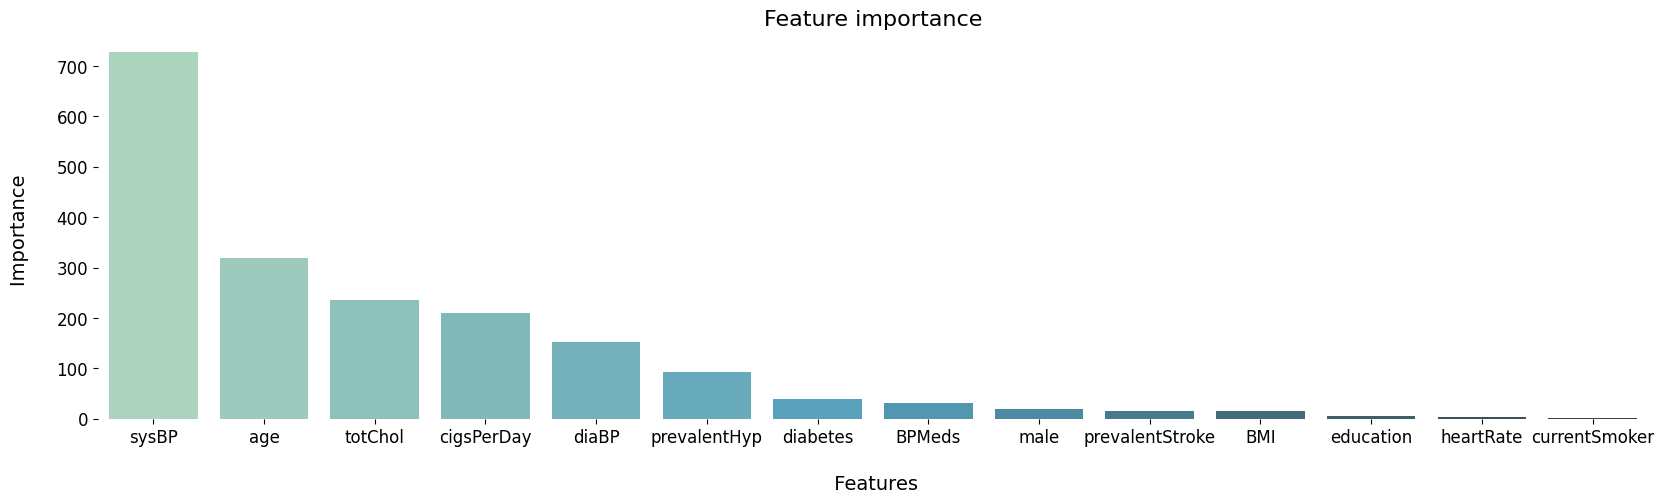

In [7]:
# visualizing feature selection
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
features_list = featureScores["Specs"].tolist()[:13]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'prevalentStroke',
 'BMI',
 'education',
 'heartRate']

In [9]:
df = df[['sysBP','age','totChol','cigsPerDay','diaBP','TenYearCHD']]
df.head()

,sysBP,age,totChol,cigsPerDay,diaBP,TenYearCHD
0,106.0,39,195.0,0.0,70.0,0
1,121.0,46,250.0,0.0,81.0,0
2,127.5,48,245.0,20.0,80.0,0
3,150.0,61,225.0,30.0,95.0,1
4,130.0,46,285.0,23.0,84.0,0


In [10]:
from sklearn.model_selection import train_test_split

y = df['TenYearCHD'] #target variable
X = df.drop(['TenYearCHD'], axis = 1) #features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3392, 5) (3392,)
(848, 5) (848,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as lm


# fit a model
lm = lm.LogisticRegression()
model = lm.fit(X_train, y_train)
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#model.score(X_test, y_test)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.943


In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, normalize=True)
)

0.7535377358490566


In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, normalize=True)
)

0.8325471698113207


In [15]:

# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=5)
# create the sub models
estimators = []
model1 = LogisticRegression().fit(X_test,y_test)
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('cart', model2))

# create the ensemble model
ensemble = VotingClassifier(estimators)

over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', ensemble)]
pipeline = Pipeline(steps=steps)


results = model_selection.cross_val_score(pipeline, X, y, cv=kfold)
print(results.mean())

0.9922000000000001


# ECE 228 Optimizations #

### Cleveland Dataset ###

In [16]:
!pip3 install liac-arff

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11782 sha256=6a30b151eaf5b367359b0f2f177c423dc6463927ce14877b8e5b9a8421b43ef0
  Stored in directory: c:\users\19666\appdata\local\pip\cache\wheels\00\23\31\5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


  DEPRECATION: Building 'liac-arff' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'liac-arff'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [17]:
import arff

def parse_arff_to_csv(arff_path, csv_path):
    with open(arff_path, 'r') as f:
        lines = f.readlines()

    data_start = False
    data = []
    columns = []

    for line in lines:
        line = line.strip()
        if line.lower().startswith('@attribute'):
            parts = line.split()
            if len(parts) >= 2:
                columns.append(parts[1])
        elif line.lower() == '@data':
            data_start = True
        elif data_start and line and not line.startswith('%'):
            data.append([x.strip() for x in line.split(',')])

    df = pd.DataFrame(data, columns=columns)
    df.replace('?', pd.NA, inplace=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    df.to_csv(csv_path, index=False)
    print(f"Saved CSV to: {csv_path}")

In [18]:
parse_arff_to_csv('Cleveland/cleveland.dat', 'Cleveland/cleveland.csv')

Saved CSV to: Cleveland/cleveland.csv


C:\Users\19666\AppData\Local\Temp\ipykernel_27756\1153347187.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [19]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the parsed Cleveland dataset
df_cleveland = pd.read_csv('Cleveland/cleveland.csv', names=column_names, header=0)

# Ensure types are correct and handle missing values
df_cleveland = df_cleveland.replace('?', pd.NA)
df_cleveland = df_cleveland.apply(pd.to_numeric, errors='coerce')

### Heart + Disease Dataset ###

In [18]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

In [19]:
files = [
    "heart+disease/processed.cleveland.data",
    "heart+disease/reprocessed.hungarian.data",
    "heart+disease/processed.switzerland.data",
    "heart+disease/processed.va.data"
]

dfs = []

for file in files:
    df = pd.read_csv(file, header=None, names=column_names, na_values='?')
    dfs.append(df)

# Combine all
df_heart_disease = pd.concat(dfs, ignore_index=True)

In [20]:
# Shows lengths of the three datasets we use
print("Framingham: ", len(df))
print("Cleveland: ", len(df_cleveland))
print("Heart Disease: ", len(df_heart_disease))

Framingham:  200
Cleveland:  303
Heart Disease:  920


In [21]:
df_heart_disease.to_csv("heart_disease.csv", index=False)